# Problem 1: Non-Performing Loan Flag Prediction from Credit Card Information

In [50]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Data Sources

In [51]:
data_dir = 'data'

trxfile = os.path.join(data_dir, 'trx.csv')
cardfile = os.path.join(data_dir, 'card.csv')
custfile = os.path.join(data_dir, 'cust.csv')
trainfile = os.path.join(data_dir, 'train.csv')
testfile = os.path.join(data_dir, 'test.csv')

trx_df = pd.read_csv(trxfile)
card_df = pd.read_csv(cardfile)
cust_df = pd.read_csv(custfile)

print("# of transactions = %d" % len(trx_df))
print("# of cards = %d" % len(card_df))
print("# of customers = %d" % len(cust_df))

# card_no, label
train_df = pd.read_csv(trainfile, header=None)
# card_no
test_df = pd.read_csv(testfile, header=None)

print('')
print('# of train cases = %d' % len(train_df))
print('# of test cases = %d' % len(test_df))

# of transactions = 627291
# of cards = 11875
# of customers = 9544

# of train cases = 9500
# of test cases = 2375


## Data Exploration

In [52]:
trx_df.head()

,card_no,txn_date,txn_hour,txn_amount,mer_cat_code,mer_id
0,1234000000010196,2016-08-03 00:00:00,19,250.0,5411,0
1,1234000000020315,2016-08-03 00:00:00,19,400.0,6300,0
2,1234000000013283,2016-08-03 00:00:00,19,500.0,6300,0
3,1234000000027192,2016-08-03 00:00:00,19,50.0,7832,0
4,1234000000006620,2016-08-03 00:00:00,19,1300.0,5812,0


In [53]:
trx_df.describe(include='all')

,card_no,txn_date,txn_hour,txn_amount,mer_cat_code,mer_id
count,6.272910e+05,627291,627291.000000,6.272910e+05,627291.000000,627291.000000
unique,NaN,244,NaN,NaN,NaN,NaN
top,NaN,2016-04-30 00:00:00,NaN,NaN,NaN,NaN
freq,NaN,3319,NaN,NaN,NaN,NaN
mean,1.234000e+15,NaN,14.484032,1.719821e+03,5813.004499,7341.813264
std,9.577850e+03,NaN,4.671009,1.743873e+04,871.895787,10816.667616
min,1.234000e+15,NaN,0.000000,5.000000e+01,742.000000,0.000000
25%,1.234000e+15,NaN,11.000000,2.500000e+02,5411.000000,0.000000
50%,1.234000e+15,NaN,15.000000,5.000000e+02,5641.000000,0.000000
75%,1.234000e+15,NaN,18.000000,1.050000e+03,6011.000000,14013.000000


In [54]:
card_df.head()

,card_no,bill_cyc,pos_dt,cst_id,open_dt,exp_dt,cr_lmt_amt,prev_cr_lmt_amt
0,1234000000023349,20,2017-02-23 00:00:00,1000004674,2010-12-20 00:00:00,1220,70000.0,0.0
1,1234000000007292,17,2017-02-23 00:00:00,1000010084,2014-06-04 00:00:00,619,69000.0,60000.0
2,1234000000018889,20,2017-02-23 00:00:00,1000009114,2014-01-22 00:00:00,119,27000.0,32000.0
3,1234000000016887,17,2017-02-23 00:00:00,1000013313,2015-12-03 00:00:00,1220,41000.0,0.0
4,1234000000026997,17,2017-02-23 00:00:00,1000010235,2014-06-24 00:00:00,619,50000.0,60000.0


In [55]:
card_df.describe(include='all')

,card_no,bill_cyc,pos_dt,cst_id,open_dt,exp_dt,cr_lmt_amt,prev_cr_lmt_amt
count,1.187500e+04,11875.000000,11875,1.187500e+04,11875,11875.000000,1.187500e+04,1.187500e+04
unique,NaN,NaN,1,NaN,2225,NaN,NaN,NaN
top,NaN,NaN,2017-02-23 00:00:00,NaN,2009-11-22 00:00:00,NaN,NaN,NaN
freq,NaN,NaN,11875,NaN,232,NaN,NaN,NaN
mean,1.234000e+15,16.536421,NaN,1.000007e+09,NaN,664.413474,1.114629e+05,6.045589e+04
std,8.130275e+03,6.577258,NaN,4.122280e+03,NaN,339.860193,1.130223e+05,1.240106e+05
min,1.234000e+15,5.000000,NaN,1.000000e+09,NaN,119.000000,0.000000e+00,0.000000e+00
25%,1.234000e+15,10.000000,NaN,1.000004e+09,NaN,417.000000,4.300000e+04,0.000000e+00
50%,1.234000e+15,17.000000,NaN,1.000007e+09,NaN,620.000000,7.800000e+04,0.000000e+00
75%,1.234000e+15,20.000000,NaN,1.000011e+09,NaN,921.000000,1.400000e+05,7.800000e+04


In [56]:
cust_df.head()

,cst_id,incm_amt,age,main_zip_cd,cr_line_amt,pos_dt
0,1000001115,47676,41.0,11110,100000.0,2017-02-23 00:00:00
1,1000004693,27157,52.0,10170,80000.0,2017-02-23 00:00:00
2,1000008370,20990,27.0,10900,52000.0,2017-02-23 00:00:00
3,1000004738,21879,33.0,10150,40000.0,2017-02-23 00:00:00
4,1000000044,71361,62.0,50100,178000.0,2017-02-23 00:00:00


In [57]:
cust_df.describe(include='all')

,cst_id,incm_amt,age,main_zip_cd,cr_line_amt,pos_dt
count,9.544000e+03,9.544000e+03,9543.000000,9544.000000,9.544000e+03,9544
unique,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,2017-02-23 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,9544
mean,1.000007e+09,6.573088e+04,40.837996,22906.977682,1.220528e+05,NaN
std,4.083855e+03,1.067371e+05,10.332491,22631.783988,1.234623e+05,NaN
min,1.000000e+09,0.000000e+00,22.000000,10050.000000,1.500000e+04,NaN
25%,1.000004e+09,2.331350e+04,33.000000,10250.000000,4.800000e+04,NaN
50%,1.000007e+09,4.000000e+04,39.000000,10800.000000,8.000000e+04,NaN
75%,1.000011e+09,7.209000e+04,48.000000,21140.000000,1.500000e+05,NaN


## Feature Selection

### Customer and Card Features

In [58]:
feature_df = pd.merge(card_df, cust_df, on='cst_id').set_index('card_no').loc[:, ['cr_lmt_amt', 'prev_cr_lmt_amt', 'incm_amt', 'age', 'main_zip_cd', 'cr_line_amt']]

### Transaction Features

In [59]:
trx_amt_df = trx_df.loc[:, ['card_no', 'txn_amount']]
feature_df['amount_total'] = trx_amt_df.groupby(by='card_no').sum()
feature_df['amount_mean'] = trx_amt_df.groupby(by='card_no').mean()
feature_df['amount_median'] = trx_amt_df.groupby(by='card_no').median()
feature_df['amount_min'] = trx_amt_df.groupby(by='card_no').max()
feature_df['amount_max'] = trx_amt_df.groupby(by='card_no').min()
feature_df['amount_count'] = trx_amt_df.groupby(by='card_no').count()

feature_df['income_by_amt_mean'] = feature_df['incm_amt'] / feature_df['amount_mean']
feature_df['income_by_amt_total'] = feature_df['incm_amt'] / feature_df['amount_total']

In [60]:
feature_df.fillna(0, inplace=True)
feature_df.head()

,cr_lmt_amt,prev_cr_lmt_amt,incm_amt,age,main_zip_cd,cr_line_amt,amount_total,amount_mean,amount_median,amount_min,amount_max,amount_count,income_by_amt_mean,income_by_amt_total
card_no,,,,,,,,,,,,,,
1234000000023349,70000.0,0.0,58650,67.0,10310,140000.0,35800.0,436.585366,200.0,7250.0,50.0,82,134.337989,1.638268
1234000000011770,70000.0,0.0,58650,67.0,10310,140000.0,99550.0,4525.000000,1825.0,13150.0,350.0,22,12.961326,0.589151
1234000000026921,140000.0,70000.0,58650,67.0,10310,140000.0,25650.0,3664.285714,1500.0,10300.0,650.0,7,16.005848,2.286550
1234000000007292,69000.0,60000.0,19989,25.0,10150,69000.0,24800.0,442.857143,350.0,2000.0,50.0,56,45.136452,0.806008
1234000000005196,25000.0,0.0,19989,25.0,10150,69000.0,8850.0,327.777778,250.0,1350.0,200.0,27,60.983390,2.258644


In [61]:
feature_df.describe(include='all')

,cr_lmt_amt,prev_cr_lmt_amt,incm_amt,age,main_zip_cd,cr_line_amt,amount_total,amount_mean,amount_median,amount_min,amount_max,amount_count,income_by_amt_mean,income_by_amt_total
count,1.187500e+04,1.187500e+04,1.187500e+04,11875.000000,11875.000000,1.187500e+04,1.187500e+04,11875.000000,11875.000000,1.187500e+04,11875.000000,11875.000000,11875.000000,11875.000000
mean,1.114629e+05,6.045589e+04,7.039686e+04,41.079579,23098.611789,1.306273e+05,9.084867e+04,2037.039640,1120.254737,1.682348e+04,387.077895,52.824505,87.196843,12.922434
std,1.130223e+05,1.240106e+05,1.126346e+05,10.432623,22751.949361,1.317340e+05,3.493688e+05,5445.884778,3503.993864,9.744652e+04,2794.419226,44.181193,223.319779,98.057978
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,10050.000000,1.500000e+04,5.000000e+01,50.000000,50.000000,5.000000e+01,50.000000,1.000000,0.000000,0.000000
25%,4.300000e+04,0.000000e+00,2.482450e+04,33.000000,10250.000000,5.000000e+04,2.260000e+04,601.191151,325.000000,3.000000e+03,50.000000,32.000000,22.007964,0.478256
50%,7.800000e+04,0.000000e+00,4.234700e+04,39.000000,10800.000000,9.000000e+04,4.700000e+04,1029.545455,500.000000,7.500000e+03,100.000000,43.000000,41.574803,0.921484
75%,1.400000e+05,7.800000e+04,7.737350e+04,48.000000,21150.000000,1.600000e+05,9.345000e+04,1933.387446,850.000000,1.345000e+04,200.000000,66.000000,78.545289,2.049432
max,2.084780e+06,2.130796e+06,3.859715e+06,117.000000,96180.000000,2.523000e+06,2.824490e+07,243490.517241,119900.000000,5.630400e+06,119900.000000,764.000000,7134.880000,3191.140000


## Feature and Class Visualization

In [62]:
train_data = feature_df.loc[train_df.loc[:, 0]]
test_data = feature_df.loc[test_df.loc[:, 0]]

train_label = pd.DataFrame({'class': train_df.loc[:, 1]})

In [63]:
train_data.reset_index(drop=True, inplace=True)

train_visualization = pd.concat([train_data, train_label], axis=1)
train_visualization.head()

,cr_lmt_amt,prev_cr_lmt_amt,incm_amt,age,main_zip_cd,cr_line_amt,amount_total,amount_mean,amount_median,amount_min,amount_max,amount_count,income_by_amt_mean,income_by_amt_total,class
0,120000.0,140000.0,163591,36.0,72110,120000.0,129350.0,1847.857143,500.0,15800.0,50.0,70,88.530112,1.264716,0
1,90000.0,108000.0,90143,57.0,10510,90000.0,16400.0,529.032258,250.0,3000.0,150.0,31,170.392256,5.496524,1
2,300000.0,500000.0,120000,56.0,10250,300000.0,14000.0,736.842105,500.0,4000.0,200.0,19,162.857143,8.571429,0
3,20000.0,0.0,16000,29.0,51180,20000.0,21550.0,653.030303,550.0,3000.0,50.0,33,24.501160,0.742459,0
4,20000.0,0.0,16281,26.0,10310,20000.0,10450.0,254.878049,150.0,900.0,50.0,41,63.877608,1.557990,0


### Features

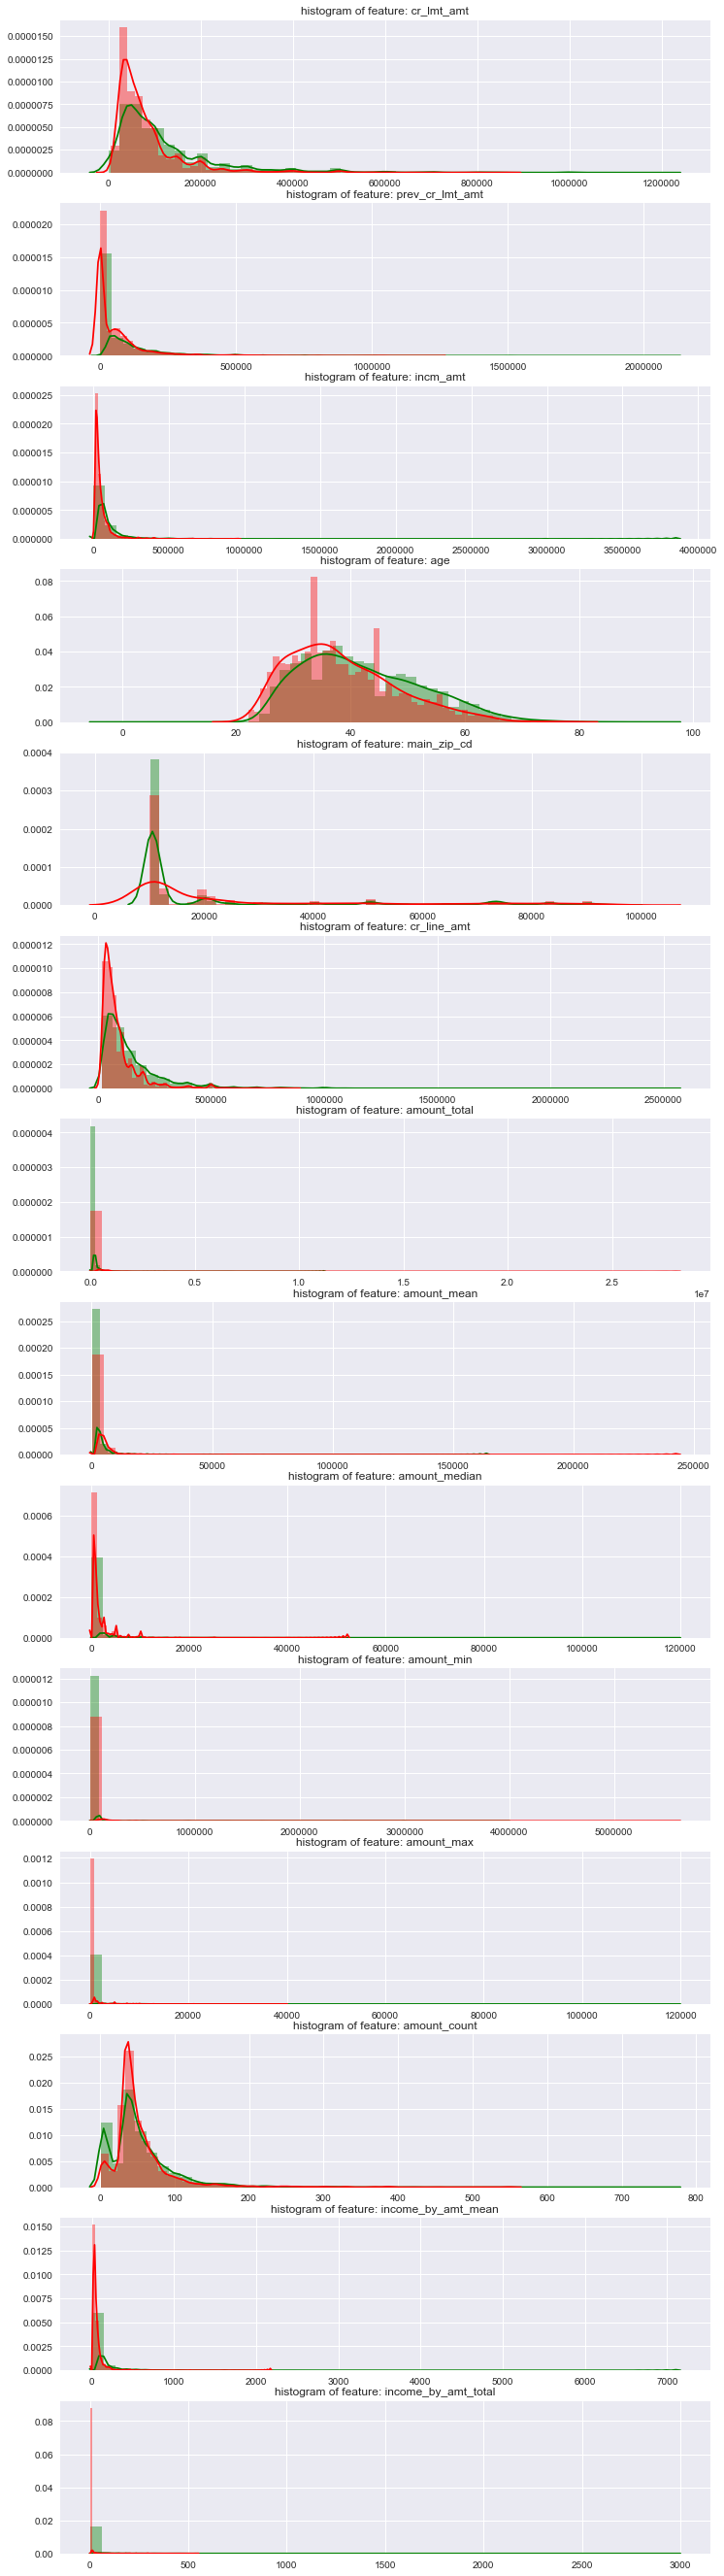

In [64]:
col_len = len(train_data.columns)

plt.figure(figsize=(12, 48))
gs = gridspec.GridSpec(col_len, 1)

for i, cn in enumerate(train_data.columns):
    ax = plt.subplot(gs[i])
    
    sns.distplot(train_visualization[cn][train_visualization['class'] == 0], bins=50, color='g')
    sns.distplot(train_visualization[cn][train_visualization['class'] == 1], bins=50, color='r')
    
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
    
plt.show()

### Classes

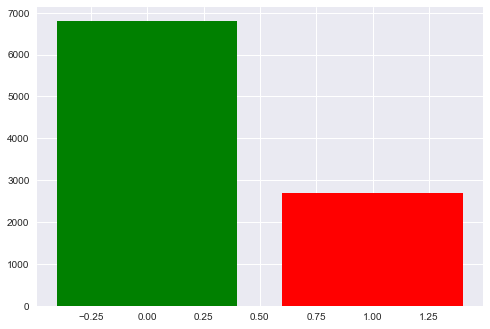

In [65]:
plt.bar([0, 1], [len(train_label[train_label['class'] == 0]), len(train_label[train_label['class'] == 1])], color=['green', 'red'])
plt.show()

## Training 

### Validation Set Splitting

In [66]:
from sklearn import preprocessing

# Use 20% of labeled data as a validation set
msk = np.random.rand(len(train_data)) < 0.8

X1 = train_data[msk].values
X1 = preprocessing.scale(X1)
t1 = train_label[msk].values.ravel()

X2 = train_data[~msk].values
X2 = preprocessing.scale(X2)
t2 = train_label[~msk].values.ravel()

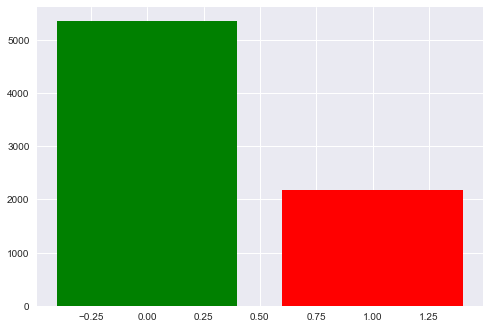

In [67]:
plt.bar([0, 1], [len(X1[t1 == 0]), len(X1[t1 == 1])], color=['green', 'red'])
plt.show()

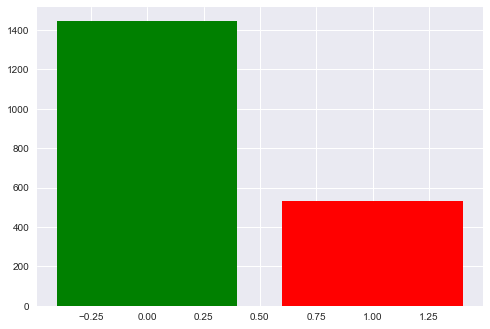

In [68]:
plt.bar([0, 1], [len(X2[t2 == 0]), len(X2[t2 == 1])], color=['green', 'red'])
plt.show()

### Use SVM

In [69]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X1, t1)

y1 = clf.predict(X1)
y2 = clf.predict(X2)

training_accuracy = float(sum(t1 == y1))/len(t1) * 100
validation_accuracy = float(sum(t2 == y2))/len(t2) * 100

print("training accuracy = %.2f%%" % training_accuracy)
print("validation accuracy = %.2f%%" % validation_accuracy)

training accuracy = 74.03%
validation accuracy = 74.28%


In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix(t2, y2)

array([[1437,    8],
       [ 500,   30]])

### Use Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X1, t1)

y1 = clf.predict(X1)
y2 = clf.predict(X2)

training_accuracy = float(sum(t1 == y1))/len(t1) * 100
validation_accuracy = float(sum(t2 == y2))/len(t2) * 100

print("training accuracy = %.2f%%" % training_accuracy)
print("validation accuracy = %.2f%%" % validation_accuracy)

training accuracy = 98.10%
validation accuracy = 73.22%


In [72]:
confusion_matrix(t2, y2)

array([[1303,  142],
       [ 387,  143]])